In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

## Time dependent 1D Schrödinger equation
[**Download this notebook**](https://ifa-edu-it.github.io/learning-material/courses/quantum-mechanics/time-dependent-Schrödinger.ipynb)

This notebook is based on the notebook with the solution of the time independent 1D Schrödinger equation and uses the same method.

The time dependent Schrödinger equation in one dimension has for an arbitrary potential function $V(x)$ the form

$$i \hbar \frac{\partial}{\partial t} \psi(x, t) = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} \psi(x, t) + V(x) \, \psi(x, t)
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(1)$$ 

In order to be able to solve the equation numerically, the boundary condition $\psi(0, t) = \psi(L, t) = 0$ is introduced. This corresponds to placing the problem inside an infinite potential well with outer limits in $x = 0$ and $x = L$.

### Units

In order to do the calculations with unitless quantities, we set $\hbar = 1$ and multiply with $mL^2$ on both sides of the equation
$$imL^2 \frac{\partial}{\partial t} \psi(x, t) = - \frac{1}{2} L^2 \frac{\partial^2}{\partial x^2} \psi(x, t) + mL^2 V(x) \, \psi(x, t) \,.
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,$$ 

Now, we make the transformation to the following variables, which the convention $\hbar = 1 \, \Rightarrow \, J = 1/s$ are unitless

$y = \frac{x}{L}$

$t' = \frac{t}{mL^2}$

$V' = mL^2 V.$

With these unitless variables the Schrödinger equation now has the form

$$ i \frac{\partial}{\partial t'} \psi(y, t') = -\frac{1}{2} \frac{\partial^2}{\partial y^2} \psi(y, t') + V'(y) \psi(y, t')
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, (2)$$

### Seperation of variables

The time dependent Schrödinger equation can be solved by seperation of variables (this is the method used in "Introduction to Quantum mechanics", Griffiths, sec 2.1), if the potential $V(x)$ is time independent. 
By seperation of variables (1) can be split up into two ordinary differential equations. One of these is the time independent Schrödinger equation $H\psi = E\psi$, which describes the spacial dependence of the wavefunctions. The solution of this equation is described in the notebook "Time independent Schrödinger equation in 1D".

The other differential equation describes the time evolution of the waefunctions and has the solution  $\phi(t) = e^{-iE_nt/\hbar}$.

A general solution to the time dependent Schrödinger equation can be calculated as a linear combination of stationary solutions and has the form

$$\Psi(x,\, t) = \Sigma_{n=1}^\infty c_n\, \psi_n(x)\, e^{-iE_nt/\hbar}\,,$$
where $\psi_n(x)$ and $E_n$ are stationary solutions to the time independent Schrödinger equation and the corresponding energy, and $c_n$ is a constant given as
$$c_n = \int_{-\infty}^{\infty} \psi_n^{\,*}(x) \,\Psi(x, 0) \, dx
\, \,\,\,\,\, \,\,\,\,\, \,\,\,\,\, \,\,\,\,\, \,\,\,\, (3)$$


In our unitless variables we have
$$\Psi(y,\, t') = \Sigma_{n=1}^\infty c_n \,\psi_n(y)\, e^{-iE_n't'}\,,$$
where $E_n' = \frac{\hbar^2}{mL^2}E_n$.

In order to solve the time dependent Schrödinger equation and calculate the coefficients $c_n$, we just need to know the potential $V(x)$ and the wavefunction at time $t = 0$, $\Psi(y, t=0)$.

### Numerical solution

The solution to the time dependent Schrödinger equation follows the same procedure as desribed in the notebook "Time independent Schrödinger equation in 1D" by solving the equation as an eigenvalue problem. 
The code is from [github](https://github.com/lukepolson/youtube_channel/blob/main/Python%20Metaphysics%20Series/vid17.ipynb)
and follows the second procedure from the youtube video [Time-Dependent Schrodinger Equation in Python: Two Different Technique](https://www.youtube.com/watch?v=kVjg3jbM3Pw).

The calculated wavefunctions $\psi_n$ are on vectorform, and the coefficients $c_n$ in (3) can be calculated as the dot product of the vector representations of the wavefunctions.
We use the function `eigh_tridiagonal` from the `scipy.linalg` library to solve the eigenvalue problem.

In the end of the notebook the time evolution of the wavefunction is animated and saved as a gif-file "timeevolution".

In [139]:
dt = 1e-7
N = 501
dy = 1/(N - 1)
y = np.linspace(0, 1, N)
psi0 = np.sqrt(2) * np.sin(np.pi * y)

def V(x):
    mu, sigma = 1/2, 1/20
    return 1e4 * np.exp(-(x - 1/2)**2 / (2 * (1 / 20)**2))

In [140]:
d = 1 / dy**2 + V(y)[1:-1]
e = -1 / (2 * dy**2) * np.ones(len(d) - 1)
E, W = eigh_tridiagonal(d, e)

In [141]:

E_js = E[0:70]
psi_js = np.pad(W.T[0:70], [(0, 0), (1, 1)], mode='constant')
cs = np.dot(psi_js, psi0)
def psi(t):
    return psi_js.T@(cs*np.exp(-1j*E_js*t))


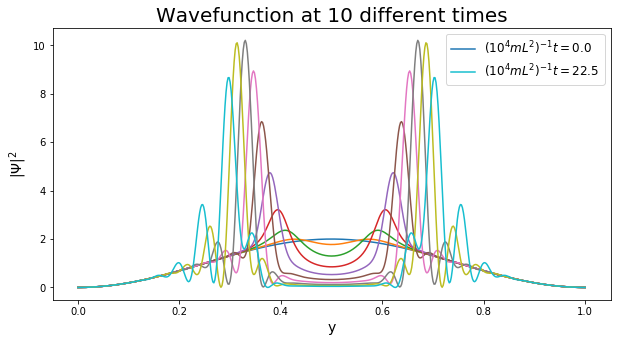

In [142]:
plt.figure(figsize=(10, 5))

for i in range(0, 10):
    if i == 0 or i == 9:
        label = r"$(10^4 mL^2)^{-1}t = $" + f"{round(2500*i*1e-3, 1)}"
    else:
        label = ""
    plt.plot(y, np.absolute(psi(2500*i*dt))**2, label = label)

plt.xlabel("y", fontsize = 14)
plt.ylabel(r"$|\Psi|^2$", fontsize = 14)
plt.title(r"Wavefunction at 10 different times", fontsize = 20)
plt.legend(fontsize = 12)

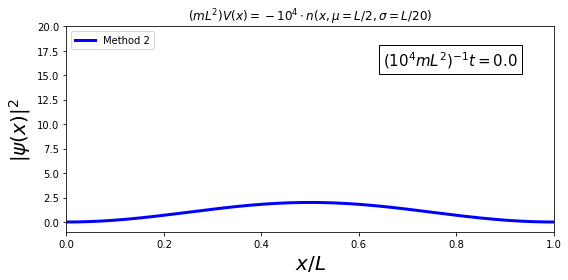

In [103]:
def animate(i):
    ln2.set_data(y, np.absolute(psi(100*i*dt))**2)
    time_text.set_text('$(10^4 mL^2)^{-1}t=$'+'{:.1f}'.format(100*i*dt*1e4))
    
fig, ax = plt.subplots(1,1, figsize=(8,4))
#ax.grid()
ln2, = plt.plot([], [], 'r-', lw=3, markersize=8, label='Method 2')
time_text = ax.text(0.65, 16, '', fontsize=15,
           bbox=dict(facecolor='white', edgecolor='black'))
ax.set_ylim(-1, 20)
ax.set_xlim(0,1)
ax.set_ylabel('$|\Psi(y)|^2$', fontsize=20)
ax.set_xlabel('$y/L$', fontsize=20)
ax.legend(loc='upper left')
ax.set_title('$(mL^2)V(y) = -10^4 \cdot n(y, \mu=L/2, \sigma=L/20)$')
plt.tight_layout()
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('timeevolution.gif',writer='pillow',fps=50,dpi=100)
